In [ ]:
#!/usr/bin/env python
# coding: utf-8

#  3D Pull Apart Model. Original model for Patrice Rey, Luke Hardiman and Trisan Salles, translated to UWGeo by Romain Beucher
#  Revisited by Patrice Rey Feb 2019

import UWGeodynamics as GEO


# In[2]:


u = GEO.UnitRegistry


# In[3]:


# Characteristic values of the system
velocity = 1.0 * u.centimeter / u.year
model_length = 256e3 * u.meter
model_width = 256e3 * u.meter
surfaceTemp = 133.15 * u.degK
baseModelTemp = 1533.15 * u.degK
bodyforce = 3300 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_length
Kt = KL / velocity
KM = bodyforce * KL**2 * Kt**2
KT = (baseModelTemp - surfaceTemp)

GEO.scaling_coefficients["[length]"] = KL
GEO.scaling_coefficients["[time]"] = Kt
GEO.scaling_coefficients["[mass]"]= KM
GEO.scaling_coefficients["[temperature]"] = KT


# # Model Geometry

# In[4]:

resolution = (32, 32, 16)
Model = GEO.Model(elementRes=resolution,
                  minCoord=(0. * u.kilometer, 0. * u.kilometer, -120. * u.kilometer),
                  maxCoord=(256. * u.kilometer, 256. * u.kilometer, 8. * u.kilometer),
                  gravity=(0.0, 0.0, -9.81 * u.meter / u.second**2))



Model.outputDir="outputs"


# In[6]:


Model.minViscosity = 1e19 * u.pascal * u.second
Model.maxViscosity = 1e23 * u.pascal * u.second
Model.stressLimiter = 300. * u.megapascal



In [ ]:
Model.diffusivity = 1e-6 * u.metre**2 / u.second
Model.capacity    = 1000. * u.joule / (u.kelvin * u.kilogram)


air               = Model.add_material(name="Air", shape=GEO.shapes.Layer3D(top=Model.top, bottom=0.0 * u.kilometer))
#stickyAir         = Model.add_material(name="StickyAir", shape=GEO.shapes.Layer3D(top=air.bottom, bottom= 0.0 * u.kilometer))
sedimentMarge     = Model.add_material(name="SedimentMarge", shape=GEO.shapes.Layer3D(top=air.bottom, bottom= -9.0 * u.kilometer))
uppercrust        = Model.add_material(name="UppperCrust", shape=GEO.shapes.Layer3D(top=sedimentMarge.bottom, bottom=-15.0 * u.kilometer))
midcrust          = Model.add_material(name="MidCrust", shape=GEO.shapes.Layer3D(top=-15.0 * u.kilometer, bottom=-20.0 * u.kilometer))
lowercrust        = Model.add_material(name="LowerCrust", shape=GEO.shapes.Layer3D(top=-20.0 * u.kilometer, bottom=-40.0 * u.kilometer))
mantleLithosphere = Model.add_material(name="MantleLithosphere", shape=GEO.shapes.Layer3D(top=-40.0 * u.kilometer, bottom=-100.0 * u.kilometer))
mantle            = Model.add_material(name="Mantle", shape=GEO.shapes.Layer3D(top=mantleLithosphere.bottom, bottom=Model.bottom))
sediment          = Model.add_material(name="Sediment")

wz_slope = GEO.shapes.HalfSpace(normal=(-0.8,0.2,0.5), origin=(158.*u.kilometer,50.*u.kilometer, 0.*u.kilometer))
wz_bottom = GEO.shapes.HalfSpace(normal=(0.8,-0.2,-0.5), origin=(160.*u.kilometer,50.*u.kilometer,0.*u.kilometer))
wz_top = GEO.shapes.HalfSpace(normal=(0.,0.,1.), origin=(200.*u.kilometer,100.*u.kilometer,0.*u.kilometer))
wz_fond = GEO.shapes.HalfSpace(normal=(0.,0.,-1.), origin=(200.*u.kilometer,100.*u.kilometer,-40.*u.kilometer))
compositeShape = wz_slope & wz_top & wz_bottom & wz_fond
Fault = Model.add_material(name="Fault", shape=compositeShape)

# Continent part
top = GEO.shapes.HalfSpace(normal=(0.,0.,1.), origin=(200.*u.kilometer,100.*u.kilometer,3.*u.kilometer))
right = GEO.shapes.HalfSpace(normal=(1.,0.,0.), origin=(256.*u.kilometer,256.*u.kilometer,-0.*u.kilometer))
bottom = GEO.shapes.HalfSpace(normal=(0.,0.,-1.), origin=(200.*u.kilometer,100.*u.kilometer,-40.*u.kilometer))
slope = GEO.shapes.HalfSpace(normal=(-0.8,0.2,0.5), origin=(160.*u.kilometer,50.*u.kilometer,0.*u.kilometer))
CompositeShape_conti = slope & top & right & bottom
continent = Model.add_material(name="continent", shape=CompositeShape_conti)

#air.diffusivity = 1.0e-6 * u.metre**2 / u.second
air.capacity = 1000. * u.joule / (u.kelvin * u.kilogram)


# ## Densities

# In[12]:


air.density         = 1. * u.kilogram / u.metre**3
#stickyAir.density   = 1. * u.kilogram / u.metre**3
Fault.density       = GEO.LinearDensity(reference_density=2000. * u.kilogram / u.metre**3)

sedimentMarge.density = GEO.LinearDensity(reference_density=2400. * u.kilogram / u.metre**3)
uppercrust.density  = GEO.LinearDensity(reference_density=2620. * u.kilogram / u.metre**3)
midcrust.density          = GEO.LinearDensity(reference_density=2850. * u.kilogram / u.metre**3)
continent.density   = GEO.LinearDensity(reference_density=2900. * u.kilogram / u.metre**3)
lowercrust.density  = GEO.LinearDensity(reference_density=2900. * u.kilogram / u.metre**3)
mantleLithosphere.density = GEO.LinearDensity(reference_density=3370. * u.kilogram / u.metre**3)
mantle.density      = GEO.LinearDensity(reference_density=3395. * u.kilogram / u.metre**3)
sediment.density          = GEO.LinearDensity(reference_density=2300. * u.kilogram / u.metre**3)

sedimentMarge.radiogenicHeatProd   = 1.2  * u.microwatt / u.meter**3
uppercrust.radiogenicHeatProd = 1.2 * u.microwatt / u.meter**3
midcrust.radiogenicHeatProd   = 0.6 * u.microwatt / u.meter**3
lowercrust.radiogenicHeatProd = 0.6 * u.microwatt / u.meter**3
continent.radiogenicHeatProd = 1.0 * u.microwatt / u.meter**3
mantleLithosphere.radiogenicHeatProd = 0.01154 * u.microwatt / u.meter**3
Fault.radiogenicHeatProd = 1. * u.microwatt / u.meter**3 # faccenda 2008: 1-5
mantle.radiogenicHeatProd = 0.01154 * u.microwatt / u.meter**3
sediment.radiogenicHeatProd   = 0.6 * u.microwatt / u.meter**3




# ## Viscosities

# In[14]:


rh = GEO.ViscousCreepRegistry()

air.viscosity                = 1e19 * u.pascal * u.second
#stickyAir.viscosity          = 1e19 * u.pascal * u.second
sedimentMarge.viscosity = rh.Wet_Quartz_Dislocation_Gleason_and_Tullis_1995
uppercrust.viscosity         = rh.Wet_Quartz_Dislocation_Gleason_and_Tullis_1995
midcrust.viscosity    = rh.Dry_Maryland_Diabase_Dislocation_Mackwell_et_al_1998
lowercrust.viscosity         = rh.Dry_Maryland_Diabase_Dislocation_Mackwell_et_al_1998
continent.viscosity    = 5e23 * u.pascal * u.second

mantleLithosphere.viscosity  = 5.0 * rh.Dry_Olivine_Dislocation_Karato_and_Wu_1990
mantle.viscosity             = rh.Dry_Olivine_Dislocation_Karato_and_Wu_1990
sediment.viscosity           = rh.Wet_Quartz_Dislocation_Gleason_and_Tullis_1995

Fault.viscosity    = 1e19 * u.pascal * u.second # * rh.Goetze_et_al_1978
Fault.minViscosity = 1e18 * u.pascal * u.second
Fault.maxViscosity = 1e20 * u.pascal * u.second


# ## Plasticities

# In[15]:


pl = GEO.PlasticityRegistry()

uppercrust.plasticity = pl.Rey_and_Muller_2010_UpperCrust
midcrust.plasticity = pl.Rey_and_Muller_2010_LowerCrust

lowercrust.plasticity = pl.Rey_and_Muller_2010_LowerCrust
continent.plasticity = pl.Rey_and_Muller_2010_UpperCrust

mantleLithosphere.plasticity  = pl.Rey_and_Muller_2010_LithosphericMantle
mantle.plasticity = mantleLithosphere.plasticity

sediment.plasticity           = pl.Huismans_et_al_2011_Crust
Fault.plasticity              = GEO.DruckerPrager(cohesion=2.0 * u.megapascal, frictionCoefficient=0.1154)



# ## Passive Tracers

# In[16]:


import numpy as np

xp = np.linspace(GEO.nd(Model.minCoord[0]), GEO.nd(Model.maxCoord[0]), 384)
yp = np.linspace(GEO.nd(Model.minCoord[1]), GEO.nd(Model.maxCoord[1]), 256)

xp, yp = np.meshgrid(xp, yp)
xp = xp.flatten()
yp = yp.flatten()
zp = np.zeros(xp.shape)

surface_tracers = Model.add_passive_tracers(name="Surface Tracers", vertices=[xp, yp, zp], zOnly=True)
moho_tracers = Model.add_passive_tracers(name="Moho", vertices=[xp, yp, zp+GEO.nd(mantleLithosphere.top)], zOnly=True)
Lab_tracers = Model.add_passive_tracers(name="Lab", vertices=[xp,yp,-90.*u.kilometer])


In [3]:
Model.set_temperatureBCs(top=133.15 * u.degK,
                         bottom=1533.15 * u.degK)


Model.set_velocityBCs(left=[-2. * u.centimeter / u.year, -2. * u.centimeter / u.year, None],
                      right=[0., None , None],
                      back=[None, 0., None],
                      front=[None, 0., None],
                      bottom=GEO.LecodeIsostasy(reference_mat=mantle,
                                                average=True),order_wall_conditions=["top", "front", "back", "bottom", "left", "right"])




In [4]:

Model.init_model()

# GEO.rcParams["initial.nonlinear.tolerance"] = 1e-2
# GEO.rcParams["nonlinear.tolerance"] = 1e-2
# GEO.rcParams["popcontrol.particles.per.cell.3D"] = 60
# GEO.rcParams["swarm.particles.per.cell.3D"] = 60

# Model.solver.options.set_inner_method = "mg"
# Model.solver.options.levels = 5
# Model.solver.options.A11.mg_coarse_pc_factor_mat_solver_type = "mumps"
# Model.solver.options.A11.mg_coarse_pc_type = "hypre"
# Model.solver.options.A11.mg_coarse_ksp_type = "cg"
# #Model.solver.options.A11.ksp_monitor = "ascii"
# Model.solver.options.A11.ksp_rtol = "1e-6"
# #Model.solver.options.scr.ksp_monitor_true_residual = "ascii"
# #Model.solver.options.scr.ksp_converged_reason = "ascii"
# Model.solver.options.scr.ksp_rtol = "1e-5"
# Model.solver.options.main.remove_constant_pressure_null_space = True
# #Model.solver.options.A11.ksp_converged_reason = "ascii"
# Model.solver.options.main.options_left = ""
# Model.solver.options.main.log_summary = ""
# # Model.run_for(10. * u.megayears, restartStep=91,   checkpoint_interval=0.05 * u.megayears)
                                                                                              

In [ ]:
Fig = glucifer.Figure()
Fig.Points(Model.swarm, Model.temperature, cullface=False, opacity=1.,)
#Fig.Points(Model.swarm, Model.materialField, cullface=False, opacity=1.)


#Fig.Mesh(Model.mesh)
viewer = Fig.viewer(resolution=(640,480))
viewer = Fig.viewer(axis=True)
viewer = Fig.viewer(rulers=False)
viewer = Fig.viewer(quality=3)


viewer.rotatex(-70)
viewer.rotatey(-10)
viewer.window()

In [ ]:
Fig = glucifer.Figure()
Fig.Points(Model.swarm, Model.plasticStrain, cullface=False, opacity=1.,)
#Fig.Points(Model.swarm, Model.materialField, cullface=False, opacity=1.)


#Fig.Mesh(Model.mesh)
viewer = Fig.viewer(resolution=(640,480))
viewer = Fig.viewer(axis=True)
viewer = Fig.viewer(rulers=False)
viewer = Fig.viewer(quality=3)


viewer.rotatex(-70)
viewer.rotatey(-10)
viewer.window()

Fig = glucifer.Figure()
Fig.Points(Model.swarm, Model.temperature, cullface=False, opacity=1.,)
#Fig.Points(Model.swarm, Model.materialField, cullface=False, opacity=1.)


#Fig.Mesh(Model.mesh)
viewer = Fig.viewer(resolution=(640,480))
viewer = Fig.viewer(axis=True)
viewer = Fig.viewer(rulers=False)
viewer = Fig.viewer(quality=3)


viewer.rotatex(-70)
viewer.rotatey(-10)
viewer.window()

Fig = glucifer.Figure()
Fig.Points(Model.swarm, Model.plasticStrain, cullface=False, opacity=1.,)
#Fig.Points(Model.swarm, Model.materialField, cullface=False, opacity=1.)


#Fig.Mesh(Model.mesh)
viewer = Fig.viewer(resolution=(640,480))
viewer = Fig.viewer(axis=True)
viewer = Fig.viewer(rulers=False)
viewer = Fig.viewer(quality=3)


viewer.rotatex(-70)
viewer.rotatey(-10)
viewer.window()

Fig = glucifer.Figure(figsize=(1200,400), title="Velocity (cm/yr)", quality=2)
Fig.Surface(Model.mesh, Model.velocityField[0])
Fig.show()

Fig = glucifer.Figure()
Fig.Points(Model.swarm, Model.pressureField, cullface=False, opacity=1.,)
#Fig.Points(Model.swarm, Model.materialField, cullface=False, opacity=1.)


#Fig.Mesh(Model.mesh)
viewer = Fig.viewer(resolution=(640,480))
viewer = Fig.viewer(axis=True)
viewer = Fig.viewer(rulers=False)
viewer = Fig.viewer(quality=3)


viewer.rotatex(-70)
viewer.rotatey(-10)
viewer.window()

## Solver, Model init

In [5]:
import matplotlib.pyplot as plt

In [6]:
mohoT = Model.temperature.evaluate(moho_tracers.swarm)[:,0].mean()
print("Moho Temperature = ", GEO.Dimensionalize(mohoT, u.degC)) 
LabT = Model.temperature.evaluate(Lab_tracers.swarm)[:,0].mean()
print("Lab Temperature = ", GEO.Dimensionalize(LabT, u.degC)) 



('Moho Temperature = ', <Quantity(599.948411045, 'degC')>)
('Lab Temperature = ', <Quantity(1015.09798604, 'degC')>)


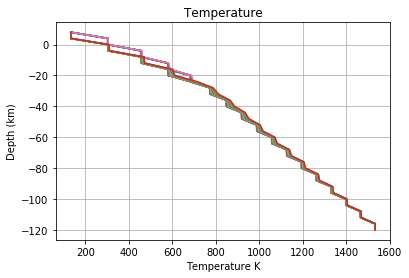

In [7]:
MyTemperatureField=(Model.temperature.data[:] * GEO.Dimensionalize(1.0, u.degK)).magnitude 

TemperatureData=np.asarray(MyTemperatureField)
TemperatureDataShaped=TemperatureData.reshape(resolution[1]+1,resolution[0]+1,resolution[2]+1)

#Two profiles located at the left walls and the middle.
plt.plot(TemperatureDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]+1))
plt.plot(TemperatureDataShaped[:, resolution[2]/2], np.linspace(Model.bottom,Model.top,resolution[1]+1))

## plt.yticks([-700,-300,-150,-40,0,68])
## plt.xticks([20, 550.0, 1350])
plt.grid()
#plt.xscale('log')
plt.xlabel('Temperature K')
plt.ylabel('Depth (km)')
plt.title('Temperature')
plt.show()

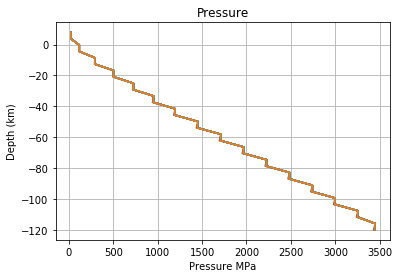

In [8]:
MyPressureField=(Model.pressureField.data[:] * GEO.Dimensionalize(1.0, u.megapascal)).magnitude 

PressureData=np.asarray(MyPressureField)
PressureDataShaped=PressureData.reshape(resolution[1],resolution[0],resolution[2])

#Two profiles located at the left walls and the middle.
plt.plot(PressureDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]))
plt.plot(PressureDataShaped[:,resolution[2]/2], np.linspace(Model.bottom,Model.top,resolution[1]))

## plt.yticks([-700,-300,-150,-40,0,68])
## plt.xticks([20, 550.0, 1350])
plt.grid()
#plt.xscale('log')
plt.xlabel('Pressure MPa')
plt.ylabel('Depth (km)')
plt.title('Pressure')
plt.show()



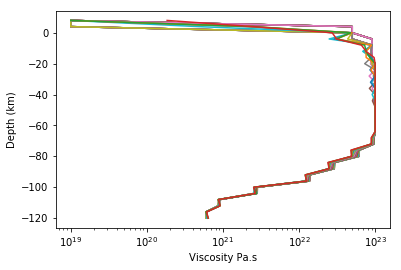

In [9]:
MyViscosityField=(Model.projViscosityField.data[:] * GEO.Dimensionalize(1.0, u.pascal * u.second)).magnitude 

ViscosityData=np.asarray(MyViscosityField)
ViscosityDataShaped=ViscosityData.reshape(resolution[1]+1,resolution[0]+1,resolution[2]+1)

#Two profiles located at the left walls and the middle.
plt.plot(ViscosityDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]+1))
plt.plot(ViscosityDataShaped[:,resolution[0]/2], np.linspace(Model.bottom,Model.top,resolution[1]+1))



## plt.yticks([-700,-300,-150,-40,0,68])
## plt.xticks([20, 550.0, 1350])
#plt.grid()
plt.xscale('log')
plt.xlabel('Viscosity Pa.s')
plt.ylabel('Depth (km)')
## plt.title('Viscosity')
plt.show()



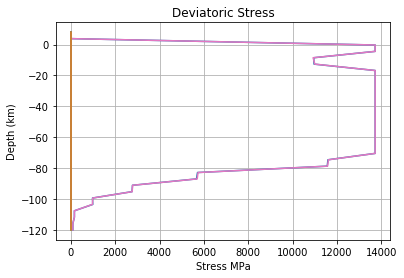

In [10]:
MyStressField=(Model.projStressField.data[:] * GEO.Dimensionalize(1.0, u.megapascal)).magnitude 

StressData=np.asarray(MyStressField)
StressDataShaped=StressData.reshape(resolution[1],resolution[0],resolution[2])

#Two profiles located at the left walls and the middle.

plt.plot(StressDataShaped[:,0], np.linspace(Model.bottom,Model.top,resolution[1]))
plt.plot(StressDataShaped[:,resolution[0]/2], np.linspace(Model.bottom,Model.top,resolution[1]))


## plt.yticks([-700,-300,-150,-40,0,68])
## plt.xticks([20, 550.0, 1350])
plt.grid()
plt.xlabel('Stress MPa')
plt.ylabel('Depth (km)')
plt.title('Deviatoric Stress')
plt.show()

In [ ]:
#Model.run_for(10.0 * u.megayears, checkpoint_interval=0.005 * u.megayears,restart_checkpoint=2)
